In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
import matplotlib.pyplot as plt
import os
import math
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


In [2]:
%load_ext autoreload

In [3]:
def plot_predictions(rul_filename, predictions):
    rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
    rul_true.columns = ['True', '']
    rul_true['Predicted'] = predictions
    rul_true = rul_true[['True', 'Predicted']]

    plt.figure(figsize=(7,4))
    plt.scatter(rul_true['True'], rul_true['Predicted'])
    plt.ylabel('Predicted RUL')
    plt.xlabel('True RUL')
    plt.title('Comparing Model Projections to Baseline')

def run(file_number):
    test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
    test_df = RUL_Model.preprocess_and_predict(test_df)
    predictions = RUL_Model.summarize_predictions_by_unit(test_df)
    print("Number of predictions:", len(predictions))
    plot_predictions('Data/RUL_FD00{}.txt'.format(file_number), predictions=predictions)

In [4]:
%autoreload 1

In [5]:
%aimport

Modules to reload:


Modules to skip:



In [8]:
%aimport RUL_Model

In [9]:
%aimport

Modules to reload:
RUL_Model

Modules to skip:



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Number of predictions: 100


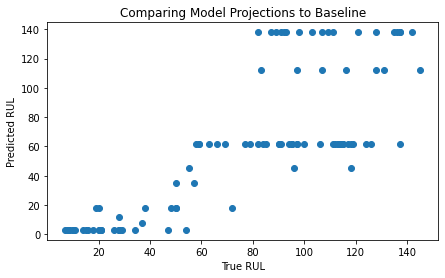

In [8]:
run(1)

Number of predictions: 259


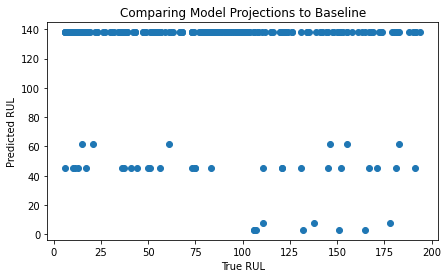

In [9]:
run(2)

Number of predictions: 100


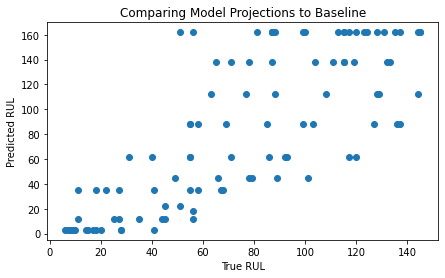

In [10]:
run(3)

Number of predictions: 248


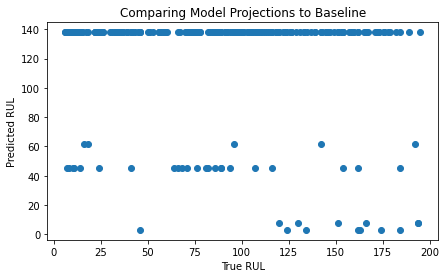

In [11]:
run(4)

In [12]:
model = RUL_Model.model

In [13]:
model.metrics

In [16]:
file_number = 2
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true.head()

,True,Predicted
0,18,138.0
1,79,138.0
2,106,138.0
3,110,138.0
4,15,138.0


In [17]:
w = [200,175,150,125,100,75,50,40,30,25,20,15,10,5] #Bin definitions associated with current models

### Scores for Test File 1

In [18]:
file_number = 1
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.16
precision_score: 0.13333333333333333
f1_score: 0.12041056394879483


### Scores for Test File 2

In [19]:
file_number = 2
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.07722007722007722
precision_score: 0.03233443141700022
f1_score: 0.025080795395704007


## Scores For Test File 3

In [20]:
file_number = 3
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.1
precision_score: 0.16527272727272727
f1_score: 0.12072321356804114


### Scores for Test Number 4

In [31]:
file_number = 4
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.09274193548387097
precision_score: 0.012642200405173757
f1_score: 0.021727573120460638


## Break Training Data into Batches to Simulate Streaming Data

In [14]:
# lookback period
history_size = 40

# how often will we train it
retrain_periodicity = 10

# cycle window for binary failure prediction
failure_prediction_size = 5

file_number = 1
train_df = pd.read_csv('Data/train_FD00{}.txt'.format(file_number), sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
max_cycle = train_df['cycle'].max()

num_retrain_periods = math.ceil(max_cycle/retrain_periodicity)
unit_end_cycle = train_df.groupby('id')['cycle'].max()

In [54]:


for i in range(0, num_retrain_periods):
    start = (i * retrain_periodicity) + 1
    end = (start+history_size-failure_prediction_size) - 1
    
    dir = 'Data/train_FD00{}'.format(file_number)
    if not os.path.exists(dir):
        os.mkdir(dir)
#     batch_df = train_df[(train_df.cycle >= start) & (train_df.cycle <= end)]
#     batch_df['label'] = np.where(batch_df['cycle'] <= w[0], 1, 0 )
#     for i in range(1,len(w)):
#         train_df.loc[train_df['RUL'] <= w[i], 'label'] = i+1
    batch_df.to_csv('{}/cycles_{}_to_{}.txt'.format(dir, start,end), sep=" ", header=None, index=False)
    

In [52]:

groupby.head()

id
1    192
2    287
3    179
4    189
5    269
Name: cycle, dtype: int64

## Iterate through Stream and generate Streaming Models

In [25]:
for i in range(0, num_retrain_periods):
    start = (i * retrain_periodicity) + 1
    end = (start+history_size-failure_prediction_size) - 1
    dir = 'Data/train_FD00{}'.format(file_number)
    print('{}/cycles_{}_to_{}.txt'.format(dir, start,end))
    batch_df = pd.read_csv('{}/cycles_{}_to_{}.txt'.format(dir, start,end), sep=" ", header=None)
    x_train_img, y_train = RUL_Model.preprocess_train(batch_df)
    model = RUL_Model.train_model(x_train_img, y_train)
    dir = 'Data/train_FD00{}_model'.format(file_number)
    if not os.path.exists(dir):
        os.mkdir(dir)
    model.save('{}/cycles_{}_to_{}.h5'.format(dir, start,end))

Data/train_FD001/cycles_1_to_35.txt
#id: 100
Epoch 1/25
1/1 - 0s - loss: 0.2475 - accuracy: 0.9375 - val_loss: 0.1389 - val_accuracy: 1.0000
Epoch 2/25
1/1 - 0s - loss: 0.1912 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 1.0000
Epoch 3/25
1/1 - 0s - loss: 0.2592 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 1.0000
Epoch 4/25
1/1 - 0s - loss: 0.2435 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 5/25
1/1 - 0s - loss: 0.2020 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 6/25
1/1 - 0s - loss: 0.1383 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 7/25
Restoring model weights from the end of the best epoch.
1/1 - 0s - loss: 0.0930 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 00007: early stopping
Data/train_FD001/cycles_11_to_45.txt
#id: 100
Epoch 1/25
1/1 - 0s - loss: 0.6849 - accuracy: 0.6125 - val_loss: 0.0885 - val_accuracy: 1.0000
Epoch 2/25
1/1 - 0s - loss: 0.1207 - accuracy: 1.0000 - v

In [26]:
print(x_train_img.shape)
print(y_train.shape)

(100, 50, 50, 17)
(100, 2)


### Outline:

1. Iterater Over Future Train Data for first n cycles:
    1. Through cycle 50, pause generate predictions
    2. Over the next 50 cycles, calculate model drift between predictions from above and what came to be.
        * Assumptions: mechanics can determine whether motor needed service during maintenance for motors flagged
        * This will be used to determine precision and model drift
        
        * !!! Warning:  Any motors not flagged that fail in the next n cycles will affect the recall score, and must trigger an immediate model retuning. This Drift is unacceptable!
        

If Recall score ever falls below 1: Immediate retraining and [Jira ticket] (Phase 1.5 tbd)
If precision falls below .8 or .9? then wasted resources, and also retraining needed
Alternatively, precision can be tracked as a cost score based on total maintenance cost

In [ ]:
Productionalizing Model Deployment / 